In [101]:
import pandas as pd

In [102]:
df = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

In [103]:
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [104]:
df[ "FullDate" ] = pd.to_datetime(df[ "FullDate" ])
df = df.set_index('FullDate') 

In [105]:
df = df.resample( 'D' ).sum()

In [106]:
df = df.reset_index()
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
3829,2021-02-24,537.6,-1525.49745,134.4000,634.770
3830,2021-02-25,518.4,4539.07855,130.5048,577.515
3831,2021-02-26,547.2,9517.02430,130.1808,1445.495
3832,2021-02-27,564.0,4932.88015,130.0800,488.980


In [107]:
from prophet import Prophet
import pandas as pd
df1 = df.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" })
df1.head()


,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [108]:
train = df1.iloc[:2757]

test = df1.iloc[2757:]

In [109]:
print(len(train), len(test))

2757 1077


####
### Question 14-17

22:51:19 - cmdstanpy - INFO - Chain [1] start processing
22:51:20 - cmdstanpy - INFO - Chain [1] done processing


             ds
2757 2018-03-20
2758 2018-03-21
2759 2018-03-22
2760 2018-03-23
2761 2018-03-24
...         ...
3829 2021-02-24
3830 2021-02-25
3831 2021-02-26
3832 2021-02-27
3833 2021-02-28

[1077 rows x 1 columns]


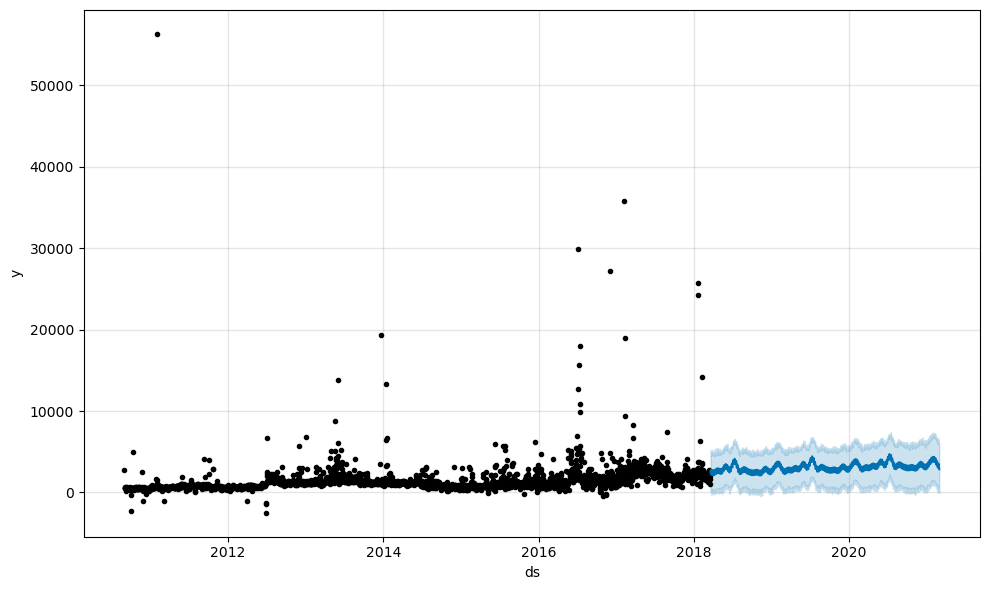

In [110]:
model = Prophet()
model.fit(train)
import matplotlib.pyplot as plt
#predict for the next 10 months
future = test['ds']
future = future.to_frame(name='ds')
print(future)
forecast = model.predict(future)
forecast.head()
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries
model.plot(forecast)
plt.show() 

In [111]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2689.339501,103.003641,4851.066348,2689.339501,2689.339501,-155.544743,-155.544743,-155.544743,9.730924,9.730924,9.730924,-165.275667,-165.275667,-165.275667,0.0,0.0,0.0,2533.794758
1,2018-03-21,2690.146479,304.886499,5094.231329,2690.146479,2690.146479,-2.999529,-2.999529,-2.999529,159.371311,159.371311,159.371311,-162.370841,-162.370841,-162.370841,0.0,0.0,0.0,2687.146950
2,2018-03-22,2690.953457,413.404096,5214.803200,2690.953457,2690.953457,95.220809,95.220809,95.220809,257.123036,257.123036,257.123036,-161.902227,-161.902227,-161.902227,0.0,0.0,0.0,2786.174266
3,2018-03-23,2691.760435,132.703385,4851.637966,2691.760435,2691.760435,-113.426059,-113.426059,-113.426059,50.278212,50.278212,50.278212,-163.704271,-163.704271,-163.704271,0.0,0.0,0.0,2578.334376
4,2018-03-24,2692.567413,-92.108214,4572.044156,2692.567413,2692.567413,-438.985887,-438.985887,-438.985887,-271.450904,-271.450904,-271.450904,-167.534983,-167.534983,-167.534983,0.0,0.0,0.0,2253.581526


In [112]:
import numpy as np
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test.y, forecast.yhat))
round(rmse, 2) 

3214.12

In [113]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(test.y, forecast.yhat)
round(mape, 4) 

5.4758

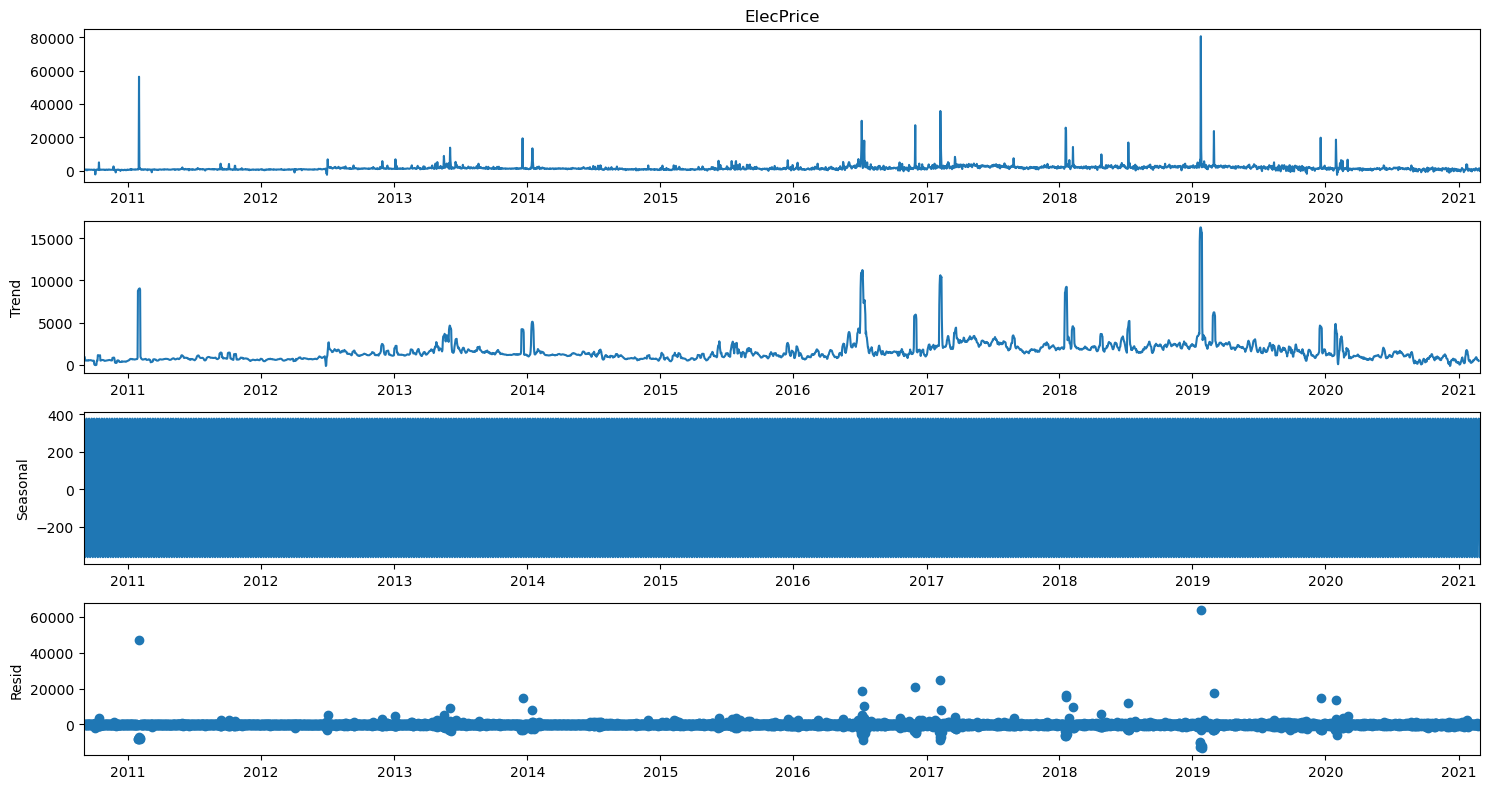

In [70]:
import statsmodels.api as sm
from pylab import rcParams
df_ = df.set_index('FullDate')
rcParams[ 'figure.figsize' ] = 15 , 8
decompose_series = sm.tsa.seasonal_decompose(df_[ 'ElecPrice' ], model= 'additive' )
decompose_series.plot()
plt.show()

####
### Question 17-19

In [71]:
from prophet import Prophet
import pandas as pd
df2 = df.rename(columns={ "FullDate" : "ds" , 'Tmax':'add1','SysLoad':'add2','GasPrice':'add3',"ElecPrice" : "y" })
df2.head()


,ds,add1,add2,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [72]:
train = df2.iloc[:2757]

test = df2.iloc[2757:]

In [77]:
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model.fit(train)
import matplotlib.pyplot as plt
future = test.drop(columns = 'y')
print(future)
forecast = model.predict(future)
forecast.head()


22:35:39 - cmdstanpy - INFO - Chain [1] start processing
22:35:39 - cmdstanpy - INFO - Chain [1] done processing


             ds   add1         add2      add3
2757 2018-03-20  540.0   7696.91130  201.5880
2758 2018-03-21  571.2   4658.05865  203.2560
2759 2018-03-22  722.4  19161.78525  203.2560
2760 2018-03-23  811.2  18090.43435  198.6456
2761 2018-03-24  832.8   3763.53865  180.2160
...         ...    ...          ...       ...
3829 2021-02-24  537.6  -1525.49745  134.4000
3830 2021-02-25  518.4   4539.07855  130.5048
3831 2021-02-26  547.2   9517.02430  130.1808
3832 2021-02-27  564.0   4932.88015  130.0800
3833 2021-02-28  583.2   6675.05485  131.6352

[1077 rows x 4 columns]


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1864.983990,-99.861062,4266.683759,1864.983990,1864.983990,0.228237,0.228237,0.228237,-853.908634,...,-84.275026,-84.275026,-84.275026,-38.756955,-38.756955,-38.756955,0.0,0.0,0.0,1989.826432
1,2018-03-21,1865.674893,-199.830283,4176.570911,1865.674893,1865.674893,0.225529,0.225529,0.225529,-1023.431442,...,42.575482,42.575482,42.575482,-29.445870,-29.445870,-29.445870,0.0,0.0,0.0,1981.630175
2,2018-03-22,1866.365796,729.314736,4872.364793,1866.365796,1866.365796,0.212408,0.212408,0.212408,-214.339083,...,145.833883,145.833883,145.833883,-24.388278,-24.388278,-24.388278,0.0,0.0,0.0,2899.716308
3,2018-03-23,1867.056699,378.093278,4928.838651,1867.056699,1867.056699,0.204701,0.204701,0.204701,-274.104539,...,-44.096418,-44.096418,-44.096418,-23.443690,-23.443690,-23.443690,0.0,0.0,0.0,2583.993862
4,2018-03-24,1867.747602,-778.526503,3524.574457,1867.747602,1867.747602,0.202827,0.202827,0.202827,-1073.332361,...,-117.832138,-117.832138,-117.832138,-26.362227,-26.362227,-26.362227,0.0,0.0,0.0,1438.359005


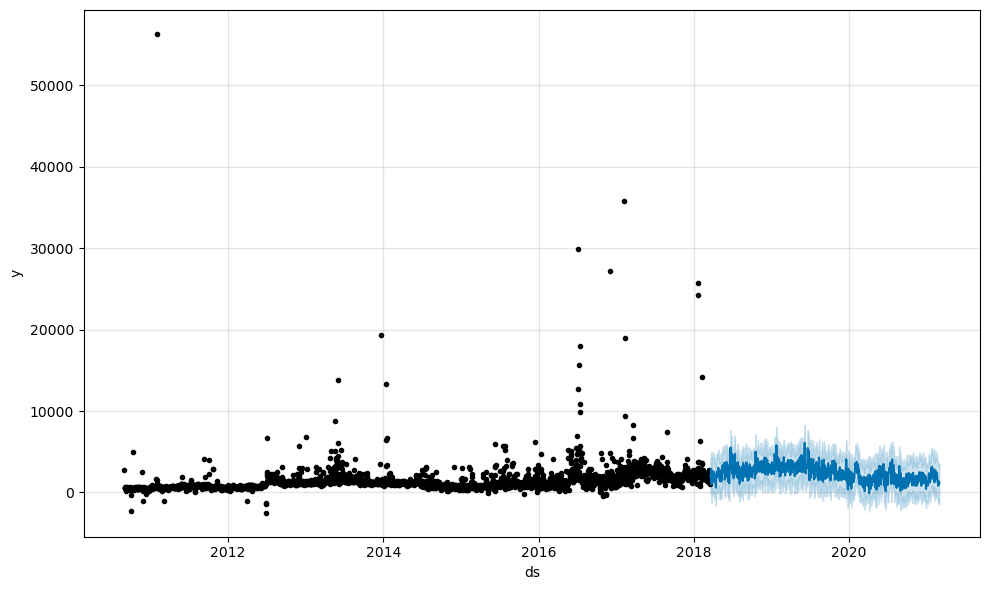

In [78]:
forecast[[ 'ds' , 'yhat' ,'add1','add2','add3', 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]
model.plot(forecast)
plt.show() 

In [79]:
import numpy as np
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test.y, forecast.yhat))
round(rmse, 2) 

2708.45

In [81]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(test.y, forecast.yhat)
round(mape, 6) 

2.327032

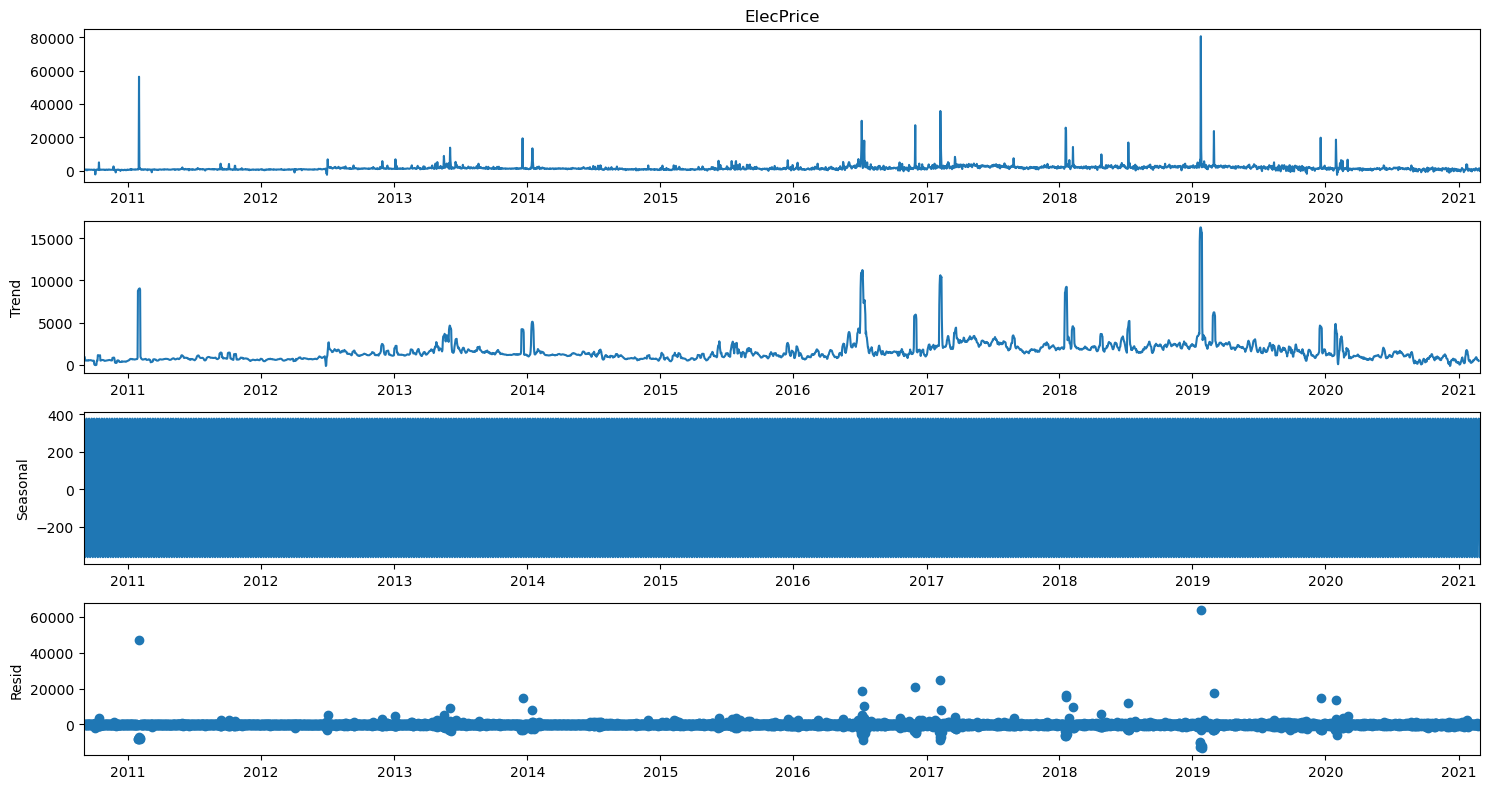

In [90]:
import statsmodels.api as sm
from pylab import rcParams
df_ = df.set_index('FullDate')
rcParams[ 'figure.figsize' ] = 15 , 8
decompose_series = sm.tsa.seasonal_decompose(df_[ 'ElecPrice' ], model= 'additive' )
seasonal = decompose_series.seasonal
decompose_series.plot()
plt.show()

C:\Users\Isha Desai\AppData\Local\Temp\ipykernel_29160\224878137.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


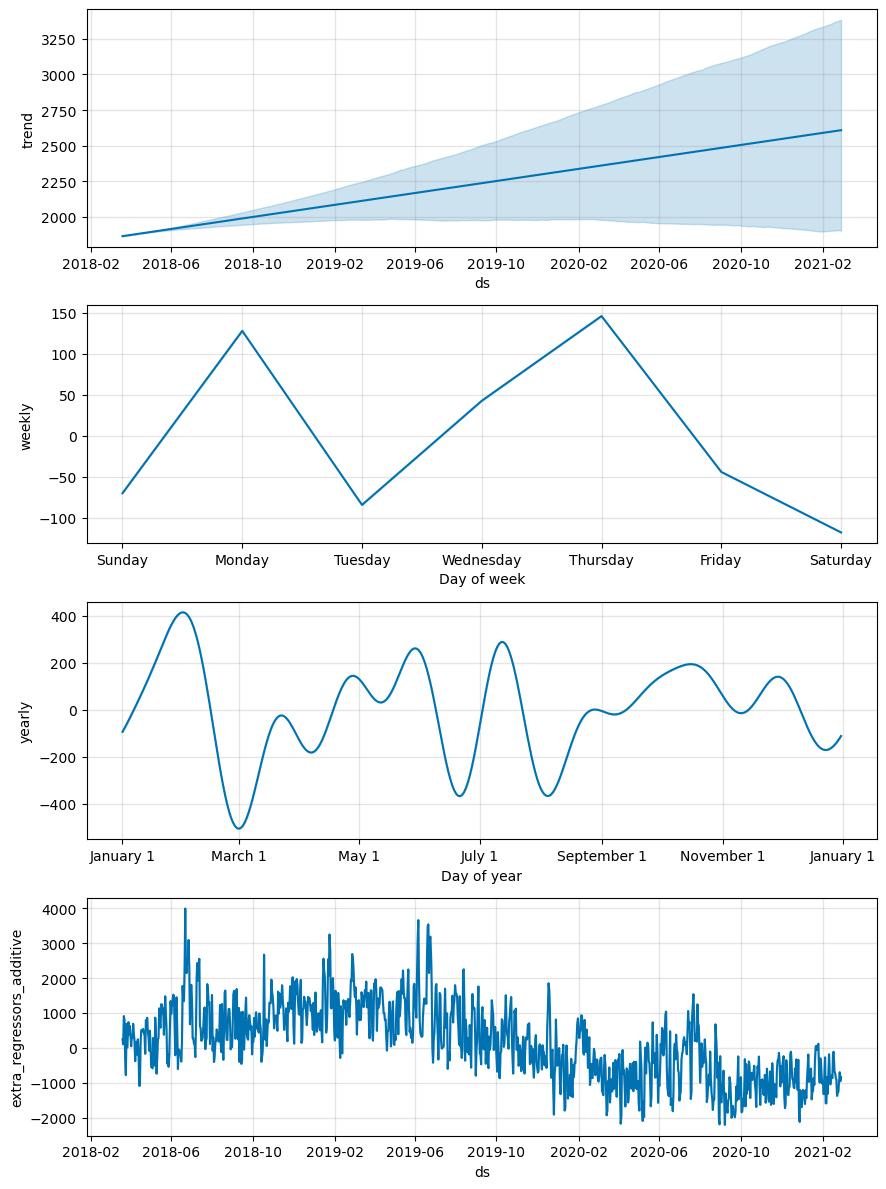

In [85]:
fig = model.plot_components(forecast)
fig.show()

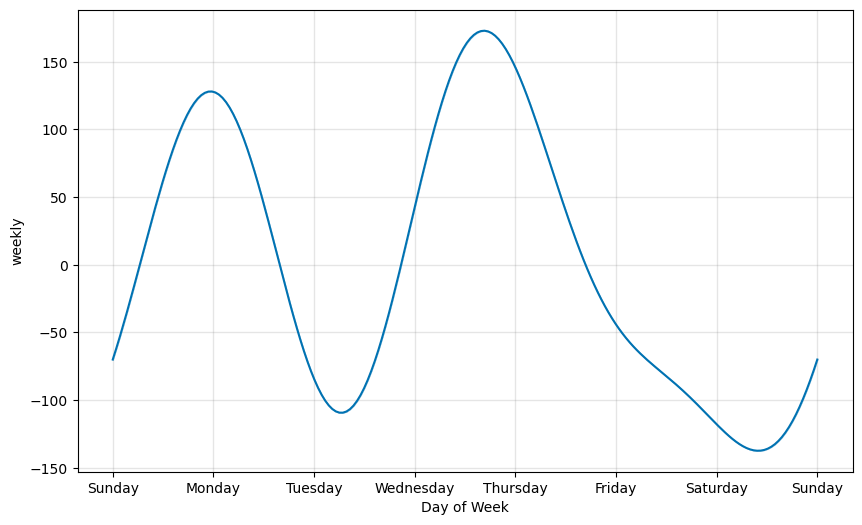

In [95]:
from prophet.plot import plot_seasonality
a = plot_seasonality(model, name = 'weekly')


In [41]:
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
3829,2021-02-24,537.6,-1525.49745,134.4000,634.770
3830,2021-02-25,518.4,4539.07855,130.5048,577.515
3831,2021-02-26,547.2,9517.02430,130.1808,1445.495
3832,2021-02-27,564.0,4932.88015,130.0800,488.980


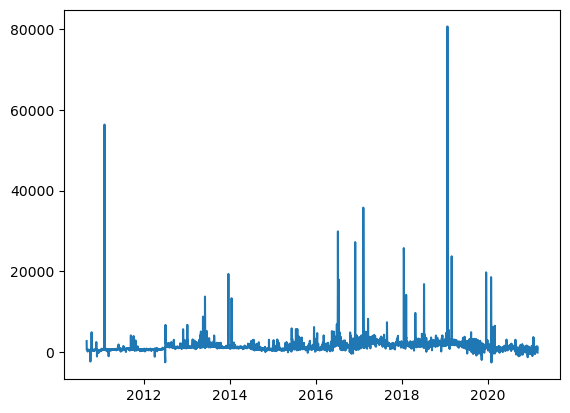

In [42]:
plt.plot(df.FullDate, df.ElecPrice)
plt.show()

In [43]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df[ 'SysLoad' ])
print('ADF Statistic:', {adf_result[ 0 ]}  )
print('p-value:' ,{adf_result[ 1 ]})
print('No. of lags used:', {adf_result[ 2 ]} )
print('No. of observations used :' ,{adf_result[ 3 ]})
print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
 print( f' {k} : {v} ' )

ADF Statistic: {-3.6901589888366417}
p-value: {0.004253725504574173}
No. of lags used: {30}
No. of observations used : {3803}
Critical Values:
 1% : -3.432070672988693 
 5% : -2.8623002987378547 
 10% : -2.567174716967499 


In [44]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df[ 'GasPrice' ])
print('ADF Statistic:', {adf_result[ 0 ]}  )
print('p-value:' ,{adf_result[ 1 ]})
print('No. of lags used:', {adf_result[ 2 ]} )
print('No. of observations used :' ,{adf_result[ 3 ]})
print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
 print( f' {k} : {v} ' )

ADF Statistic: {-2.902766697165179}
p-value: {0.04502721288462552}
No. of lags used: {27}
No. of observations used : {3806}
Critical Values:
 1% : -3.4320693157877544 
 5% : -2.8622996992165364 
 10% : -2.5671743978048323 


In [45]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df[ 'ElecPrice' ])
print('ADF Statistic:', {adf_result[ 0 ]}  )
print('p-value:' ,{adf_result[ 1 ]})
print('No. of lags used:', {adf_result[ 2 ]} )
print('No. of observations used :' ,{adf_result[ 3 ]})
print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
 print( f' {k} : {v} ' )

ADF Statistic: {-8.26905386687379}
p-value: {4.848817773711999e-13}
No. of lags used: {20}
No. of observations used : {3813}
Critical Values:
 1% : -3.432066157296446 
 5% : -2.8622983040036005 
 10% : -2.5671736550459663 


####
### Question 20

In [96]:
from prophet import Prophet
import pandas as pd
df3 = df.rename(columns={ "FullDate" : "ds" ,'SysLoad':'add2','GasPrice':'add3',"ElecPrice" : "y" })
df3.head()



,ds,Tmax,add2,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [98]:
train = df3.iloc[:2757]
test = df3.iloc[2757:]
model = Prophet()
model.add_regressor('add3')
model.add_regressor('add2')
model.fit(train)
import matplotlib.pyplot as plt
future = test.drop(columns = ['y','Tmax'])
print(future)
forecast = model.predict(future)
forecast.head()


22:47:51 - cmdstanpy - INFO - Chain [1] start processing
22:47:52 - cmdstanpy - INFO - Chain [1] done processing


             ds         add2      add3
2757 2018-03-20   7696.91130  201.5880
2758 2018-03-21   4658.05865  203.2560
2759 2018-03-22  19161.78525  203.2560
2760 2018-03-23  18090.43435  198.6456
2761 2018-03-24   3763.53865  180.2160
...         ...          ...       ...
3829 2021-02-24  -1525.49745  134.4000
3830 2021-02-25   4539.07855  130.5048
3831 2021-02-26   9517.02430  130.1808
3832 2021-02-27   4932.88015  130.0800
3833 2021-02-28   6675.05485  131.6352

[1077 rows x 3 columns]


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add2,add2_lower,add2_upper,add3,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1866.594687,-183.050592,4211.518928,1866.594687,1866.594687,-855.528656,-855.528656,-855.528656,1102.374639,...,-84.214575,-84.214575,-84.214575,-38.487928,-38.487928,-38.487928,0.0,0.0,0.0,1990.738166
1,2018-03-21,1867.290909,-225.087292,4187.939755,1867.290909,1867.290909,-1025.373080,-1025.373080,-1025.373080,1126.869617,...,42.688277,42.688277,42.688277,-29.177298,-29.177298,-29.177298,0.0,0.0,0.0,1982.298425
2,2018-03-22,1867.987131,671.396894,5173.422855,1867.987131,1867.987131,-214.745724,-214.745724,-214.745724,1126.869617,...,145.369125,145.369125,145.369125,-24.119506,-24.119506,-24.119506,0.0,0.0,0.0,2901.360643
3,2018-03-23,1868.683352,269.628625,4899.473076,1868.683352,1868.683352,-274.624566,-274.624566,-274.624566,1059.164792,...,-44.017695,-44.017695,-44.017695,-23.173689,-23.173689,-23.173689,0.0,0.0,0.0,2586.032195
4,2018-03-24,1869.379574,-854.809230,3816.839177,1869.379574,1869.379574,-1075.368671,-1075.368671,-1075.368671,788.521713,...,-117.902874,-117.902874,-117.902874,-26.089696,-26.089696,-26.089696,0.0,0.0,0.0,1438.540046


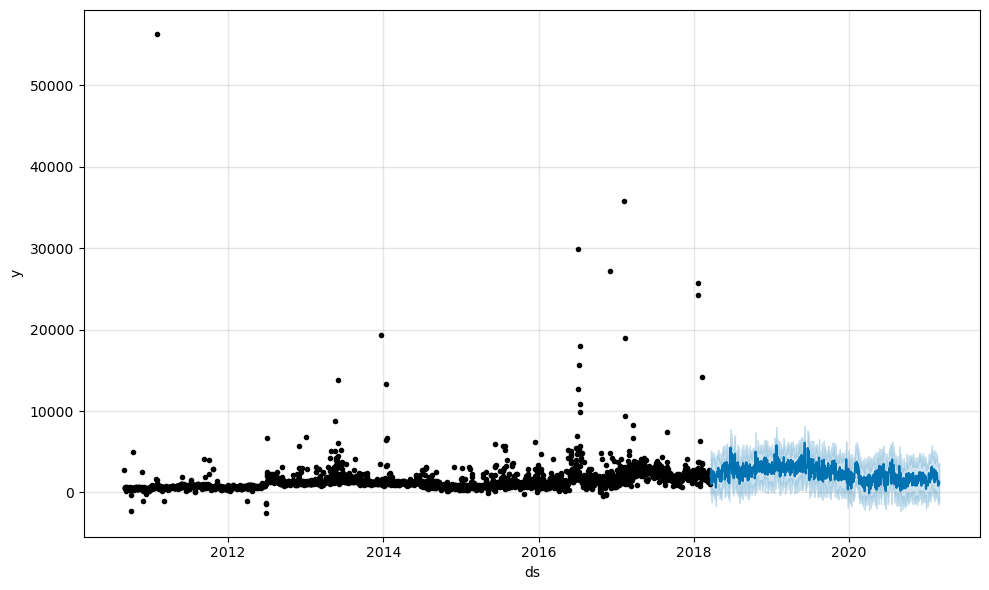

In [99]:
forecast[[ 'ds' , 'yhat' ,'add2','add3', 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]
model.plot(forecast)
plt.show() 

In [100]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(test.y, forecast.yhat)
round(mape, 6) 

2.334429